In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_apps = pd.read_csv("../data/cleaned_googleplaystore.csv")
df_reviews = pd.read_csv("../data/cleaned_user_reviews.csv")

df_apps.head(), df_reviews.head()


(                                                 App        Category  Rating  \
 0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
 1                                Coloring book moana  ART_AND_DESIGN     3.9   
 2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
 3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
 4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
 
     Reviews  Size    Installs  Type  Price Content Rating  \
 0     159.0   19M     10000.0  Free    0.0       Everyone   
 1     967.0   14M    500000.0  Free    0.0       Everyone   
 2   87510.0  8.7M   5000000.0  Free    0.0       Everyone   
 3  215644.0   25M  50000000.0  Free    0.0           Teen   
 4     967.0  2.8M    100000.0  Free    0.0       Everyone   
 
                       Genres      Last Updated         Current Ver  \
 0               Art & Design   January 7, 2018               1.0.0

In [21]:
print("APPS DATASET:")
display(df_apps.info())

print("\nUSER REVIEWS DATASET:")
display(df_reviews.info())


APPS DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   float64
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   float64
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(4), object(9)
memory usage: 903.2+ KB


None


USER REVIEWS DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


None

In [22]:
print("Apps dataset statistics:")
display(df_apps.describe(include='all'))

print("User reviews statistics:")
display(df_reviews.describe(include='all'))


Apps dataset statistics:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8892,8892,8892.000000,8.892000e+03,8892,8.892000e+03,8892,8892.0,8892,8892,8892,8888,8890
unique,8196,33,NaN,NaN,414,NaN,2,NaN,6,115,1300,2638,31
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1718,NaN,NaN,1468,NaN,8279,NaN,7095,733,291,1258,1987
mean,NaN,NaN,4.187877,4.727764e+05,NaN,1.648965e+07,NaN,0.0,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.522377,2.905052e+06,NaN,8.637600e+07,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000e+00,NaN,1.000000e+00,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,1.640000e+02,NaN,1.000000e+04,NaN,0.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,4.714500e+03,NaN,5.000000e+05,NaN,0.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,7.126675e+04,NaN,5.000000e+06,NaN,0.0,NaN,NaN,NaN,NaN,NaN


User reviews statistics:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,29692,29692,29692,29692.000000,29692.000000
unique,865,27994,3,NaN,NaN
top,Facebook,Good,Positive,NaN,NaN
freq,130,137,19015,NaN,NaN
mean,NaN,NaN,NaN,0.188868,0.490930
std,NaN,NaN,NaN,0.355694,0.265976
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.350000
50%,NaN,NaN,NaN,0.157143,0.514286
75%,NaN,NaN,NaN,0.422917,0.652703


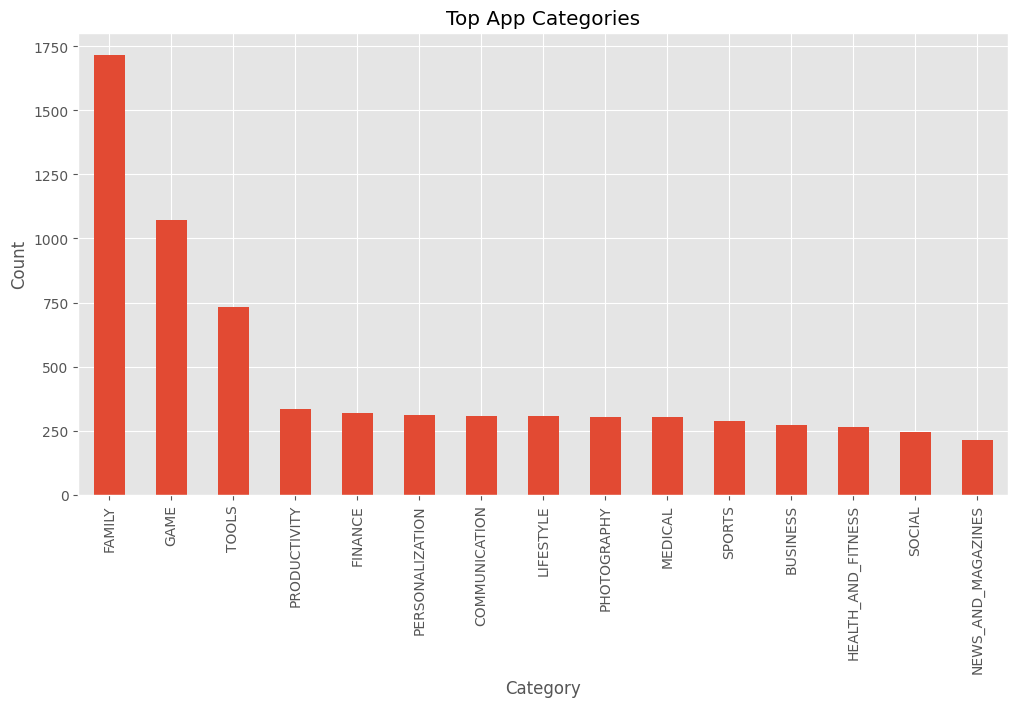

In [23]:
plt.figure(figsize=(12,6))
df_apps['Category'].value_counts().head(15).plot(kind='bar')
plt.title("Top App Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


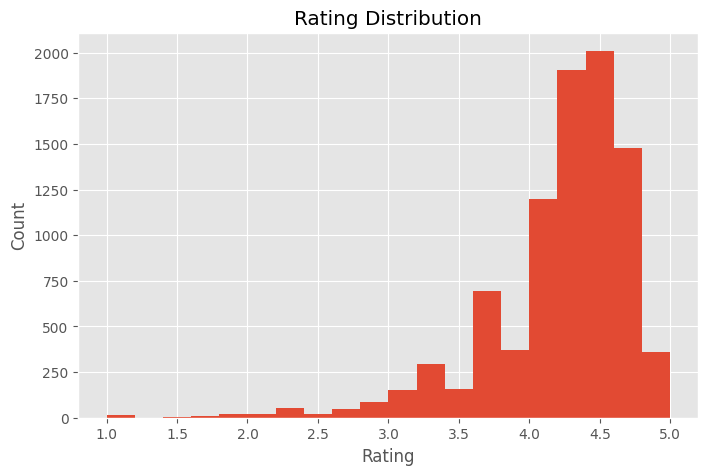

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df_apps['Rating'], bins=20)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


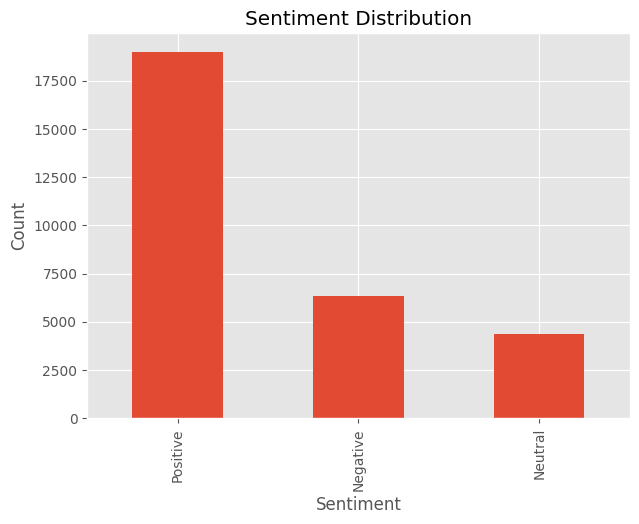

In [25]:
plt.figure(figsize=(7,5))
df_reviews['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


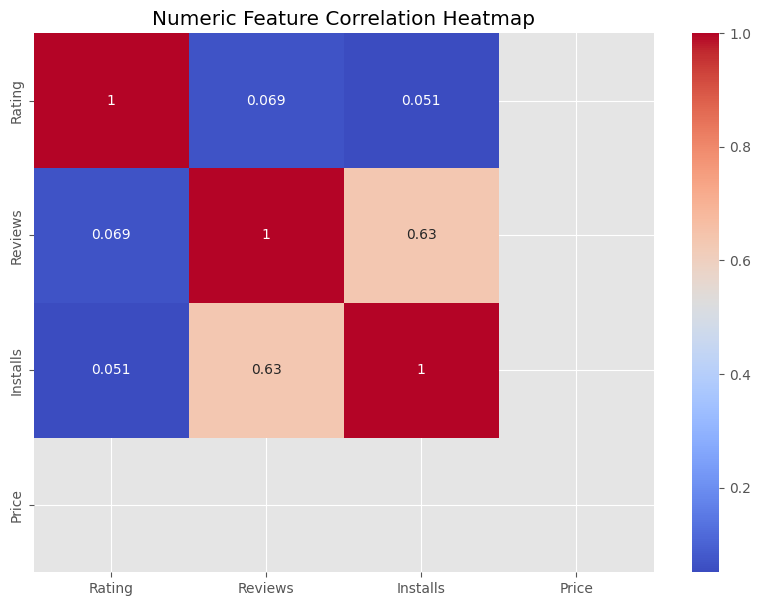

In [26]:
num_df = df_apps.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,7))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation Heatmap")
plt.show()


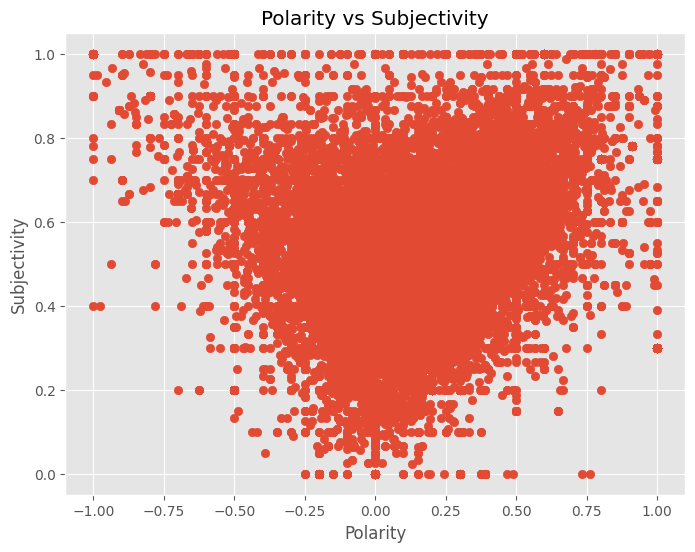

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df_reviews['Sentiment_Polarity'], df_reviews['Sentiment_Subjectivity'])
plt.title("Polarity vs Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()
